# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Carregando a base do DataSUS
datasus = pd.read_csv('sinasc_RO_2019.csv')

# Carregando a base de dados
#dicionario = pd.read_pdf('Estrutura_SINASC_para_CD.pdf')

In [3]:
# Criando o Dataframe
datasus = pd.DataFrame(datasus)
datasus.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
datasus.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [5]:
datasus[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE
0,9.0,10.0,Masculino,37 a 41 semanas,5.0
1,8.0,9.0,Feminino,37 a 41 semanas,2.0
2,8.0,10.0,Feminino,37 a 41 semanas,9.0
3,9.0,10.0,Feminino,37 a 41 semanas,5.0
4,8.0,10.0,Feminino,37 a 41 semanas,2.0
...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0


<Axes: xlabel='GESTACAO', ylabel='count'>

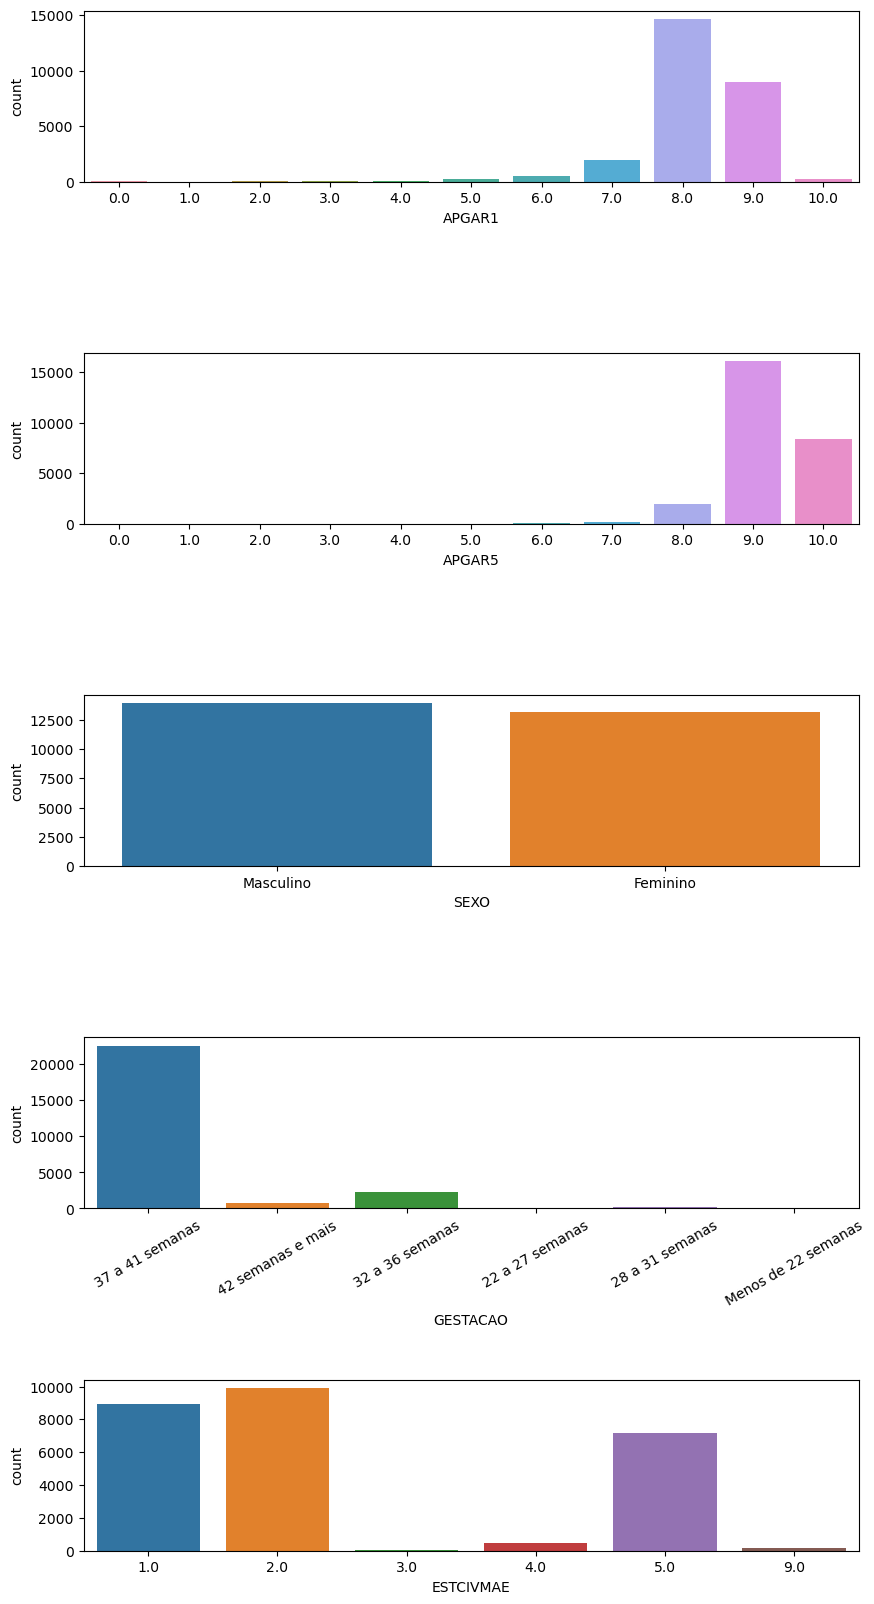

In [6]:
plt.close('all')

fig, axes = plt.subplots(5, 1, figsize=(10, 20))
plt.subplots_adjust(hspace=1)

sns.countplot(data=datasus, x='APGAR1', ax=axes[0])
sns.countplot(data=datasus, x='APGAR5', ax=axes[1])
sns.countplot(data=datasus, x='SEXO', ax=axes[2])
sns.countplot(data=datasus, x='GESTACAO', ax=axes[3])
axes[3].tick_params(axis='x', rotation=30)
sns.countplot(data=datasus, x='ESTCIVMAE', ax=axes[4])
sns.countplot(data=datasus, x='GESTACAO', ax=axes[3])

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

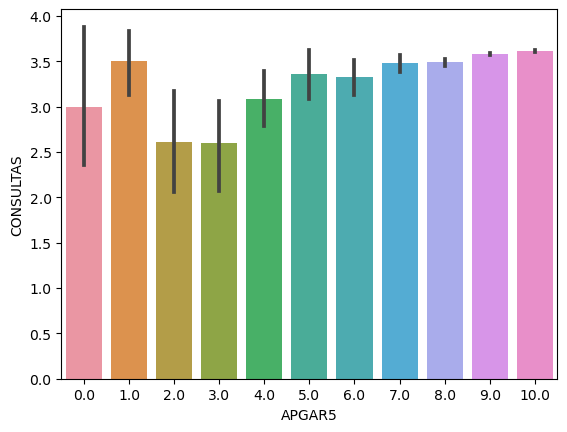

In [7]:
plt.close('all')

sns.barplot(datasus, x='APGAR5', y = 'CONSULTAS', estimator="mean")

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

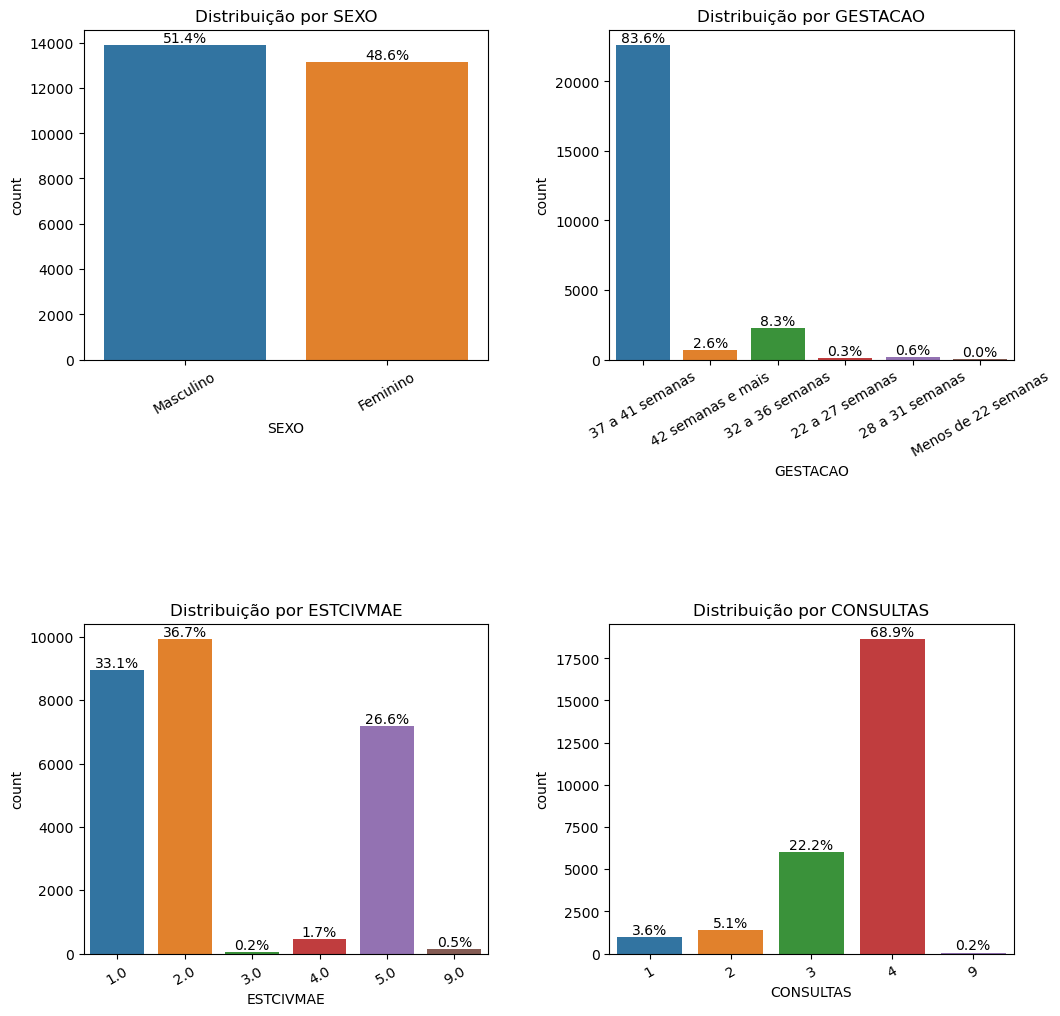

In [8]:
plt.close('all')

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Lista de variáveis
variables = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

for i, var in enumerate(variables):
    
    ax = axes[i//2, i%2]
    
    # Cria o gráfico de contagem
    ax = sns.countplot(data=datasus, x=var, ax=ax)
    ax.set_title(f'Distribuição por {var}')
    ax.tick_params(axis='x', rotation=30)
    
    # Calcula o total de observações
    total = len(datasus[var])
    
    # Adiciona anotações de porcentagem em cada barra
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()